MSE:  0.0047503746961064935
R2 score:  0.9881044431366519


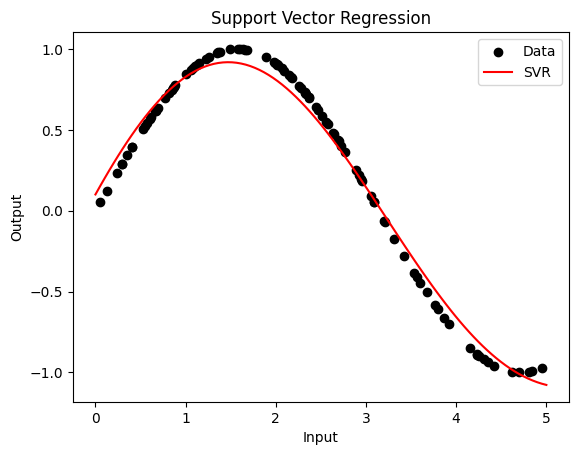

In [2]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Generate some example data
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

# Scale the input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create an SVR model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)

# Train the model
svr.fit(X_scaled, y)

# Generate predictions on new data
X_new = np.linspace(0, 5, 100).reshape(-1, 1)
X_new_scaled = scaler.transform(X_new)
y_pred = svr.predict(X_new_scaled)

# Evaluate the model
y_pred_scaled = svr.predict(X_scaled)
mse = mean_squared_error(y, y_pred_scaled)
r2 = r2_score(y, y_pred_scaled)
print('MSE: ', mse)
print('R2 score: ', r2)

# Visualize the results
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_new, y_pred, color='red', label='SVR')
plt.legend()
plt.title('Support Vector Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()